# Object Oriented Programming, Numba, and Equalizing Differences Model

<div align="right"><button><a href="https://colab.research.google.com/github/QuantEcon/workshop.africa-july2023/blob/main/day-07/exercise_set_7_with_solution.ipynb"><img src="" heght="10px"/><img
  src="https://colab.research.google.com/assets/colab-badge.svg"
  alt="open with Colab" width="100px"/></a></button></div>

#### Written for the QuantEcon Africa Workshop (July 2023)
#### Author: [Humphrey Yang](https://github.com/HumphreyYang)

In [1]:
import numpy as np
import numba as nb
import matplotlib.pyplot as plt

from scipy.optimize import newton

## Exercise 1

We start with some exercises on objects and names in Python.


***Exercise 1.1***

Print the type of the following objects:

In [2]:
a = 0.5
b = 5
c = 'a'
d = ...
e = 1.0 + 1.0j
f = lambda x: x + 1
g = np.array([1, 2, 3])
h = list
j = _

var_list = [a, b, c, d, e, f, g, h, j]

## Solution

In [3]:
for i in var_list:
    print(type(i))

<class 'float'>
<class 'int'>
<class 'str'>
<class 'ellipsis'>
<class 'complex'>
<class 'function'>
<class 'numpy.ndarray'>
<class 'type'>
<class 'str'>


***Exercise 1.2***

What are unique identifiers of the following objects?

## Solution

In [5]:
a = b = 1
id(a)

4310231344

In [6]:
c = [a, b, 2]

id(c[0])

4310231344

In [7]:
j = c
id(j[0])

4310231344

In [8]:
j[0] = 2
id(j[0])

4310231376

In [9]:
c

[2, 1, 2]

***Exercise 1.3***

Check the documentation of the `dir()` function using `?dir` and print the namespace of string `'a'` and.

In [10]:
?dir

Docstring:
dir([object]) -> list of strings

If called without an argument, return the names in the current scope.
Else, return an alphabetized list of names comprising (some of) the attributes
of the given object, and of attributes reachable from it.
If the object supplies a method named __dir__, it will be used; otherwise
the default dir() logic is used and returns:
  for a module object: the module's attributes.
  for a class object:  its attributes, and recursively the attributes
    of its bases.
  for any other object: its attributes, its class's attributes, and
    recursively the attributes of its class's base classes.
Type:      builtin_function_or_method

In [11]:
dir('a')

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isascii',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'removeprefix',
 'removesuffix',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'strip',
 'swapcase',


## Exercise 2


Let's start with an easy class. Define a class called `Person` with the following attributes:

- `name`: a string
- `age`: an integer

and the following methods:

- `greet(self)`: prints out a greeting that includes the person's name and age
- `respond(self, person)`: prints out a response to a greeting from another `Person` instance that introduces `self.name`.

Create two instances of `Person` with different names and ages and have one `respond` to the other's `greet`.


## Solution

In [12]:
class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age
    
    def greet(self):
        print(f"Hello, my name is {self.name}, and I am {self.age} years old.")
    
    def respond(self, person):
        print(f"Hello, {person.name}! My name is {self.name}.")

a = Person('Alice', 25)
b = Person('Bob', 20)

a.greet()
b.respond(a)

Hello, my name is Alice, and I am 25 years old.
Hello, Alice! My name is Bob.


## Exercise 3





In [ ]:
import numba as nb

@nb.jit
def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n-1)

### Exercise 2

#### The Market

We consider a market for coffee beans.  The price per kilo is $p$.  Total supply at price $p$ is

$$ q_s (p) = b \sqrt{p} $$

and total demand is 

$$ q_d (p) = a \frac{1}{p}, $$

where $a$ and $b$ are positive parameters.

Now let's write routines to compute supply and demand as functions of price and parameters:

In [14]:
def supply(p, b):
    return b * np.sqrt(p)

def demand(p, a):
    return a * (1/p)

***Exercise 1.1***

Plot both supply and demand as functions of $p$ when $a=1$ and $b=0.5$.  Plot for prices in the interval from $0.2$ up to $4$.  Although it is unusual, put price on the horizonal axis.  Use a legend to label the two functions and be sure to label the axes.  Looking at the picture, make a rough estimate of the equilibrium price,
where demand equals supply.

### Solution

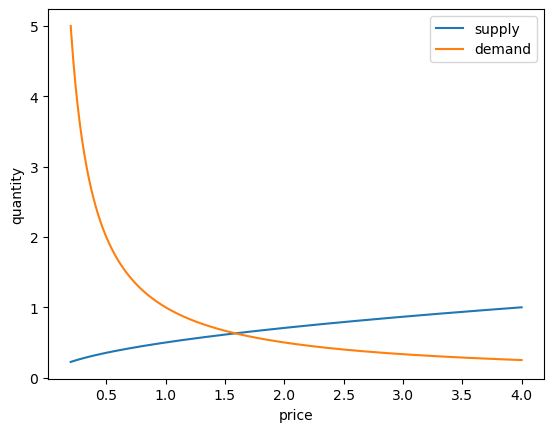

In [15]:
fig, ax = plt.subplots()
p_grid = np.linspace(0.2, 4, 200)
ax.plot(p_grid, supply(p_grid, 0.5), label='supply')
ax.plot(p_grid, demand(p_grid, 1.0), label='demand')
ax.set_xlabel("price")
ax.set_ylabel("quantity")
ax.legend()
plt.show()

The equilibrium price looks to be about 1.6.

***Exercise 1.2***

Write a function that takes arguments $a, b, p$ and returns *excess demand*, which is defined as

$$ e(p) = q_d(p) - q_s(p) $$


### Solution

In [16]:
def excess_demand(p, a, b):
    return demand(p, a) - supply(p, b)

***Exercise 1.3***

Write a class definition that creates a class called `Market` with four methods:

1. An `__init__` method that specifies default parameter values $a=1$ and $b=0.5$.
2. A `demand` method that returns $q_d(p)$ given $p$
3. A `supply` method that returns $q_s(p)$ given $p$
4. An `excess_demand` method that returns $q_d(p) - q_s(p)$ given $p$. 

Using an instance of the class, plot excess demand over the interval from $0.2$ up to $4$.  Also plot a horizontal line at zero.  The equilibrium price is where excess demand crosses zero. Compute the equilibrium price.

### Solution

In [17]:
class Market:
    
    def __init__(self, a=1.0, b=0.5):
        self.a, self.b = a, b
        
    def supply(self, p):
        return self.b * np.sqrt(p)
    
    def demand(self, p):
        return self.a * (1/p)
    
    def excess_demand(self, p):
        return self.demand(p) - self.supply(p)

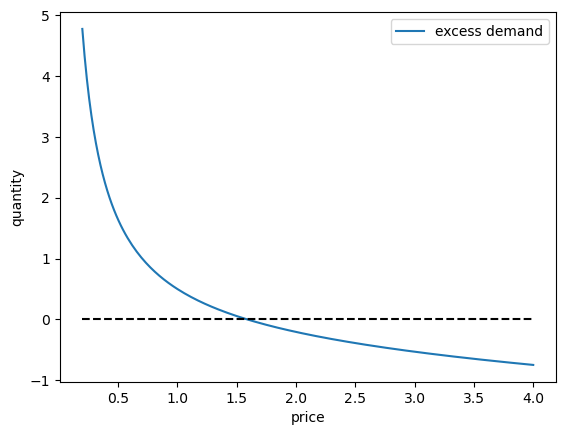

In [18]:
market = Market()

fig, ax = plt.subplots()
p_grid = np.linspace(0.2, 4, 200)
ax.plot(p_grid, market.excess_demand(p_grid), label='excess demand')
ax.plot(p_grid, np.zeros_like(p_grid), 'k--')
ax.set_xlabel("price")
ax.set_ylabel("quantity")
ax.legend()
plt.show()

Next we'll write a function that takes an instance of the `Market` class (i.e., an object `market` constructed via `market = Market()`) and returns a market clearing price via Newton's method.  If necessary, adjust your code above so that this routine works.

In [19]:
def compute_equilibrium(market, price_init=2.0):
    p_star = newton(market.excess_demand, price_init)
    return p_star

In [20]:
market = Market()
compute_equilibrium(market)

1.5874010519682002

## Exercise 2

[Martingales](https://en.wikipedia.org/wiki/Martingale_%28probability_theory%29) are a class of discrete-time stochastic processes that originates from a class of betting strategy that doubles the bet after every loss with the hope that the first win would recover all previous losses plus win a profit equal to the original stake (Read this [lecture](https://python.quantecon.org/perm_income.html#preliminaries) for more information about how martingales relate to the permanent income model).

In this exercise, Let's simulate the betting strategy and see if it really works out. 

***Exercise 2.1***

Write a simulator called `MartingaleSimulator` to simulate a person who doubles the bet when losses and halfs the bet when wins. The process stops once the person cannot afford the next bet.

Use the skeloton code below to define the class `MartingaleSimulator`:

### Solution

In [22]:
class MartingaleSimulator:
    def __init__(self, initial_balance, bet_amount, prob=0.5):
        self.initial_balance = initial_balance
        self.bet_amount = bet_amount
        self.balance = initial_balance
        self.rounds_played = 0
        self.total_wins = 0
        self.total_losses = 0
        self.balance_history = [initial_balance]
        self.bet_history = [bet_amount]
        self.prob = prob

    def play_round(self):
        self.rounds_played += 1
        assert self.balance > self.bet_amount

        if self._play_game(prob=self.prob):
            self.total_wins += 1
            self.balance += self.bet_amount
            self.bet_amount /= 2  # Half the bet amount after a win
            self.bet_amount = int(self.bet_amount)
        else:
            self.total_losses += 1
            self.balance -= self.bet_amount
            self.bet_amount *= 2  # Double the bet amount after a loss

        self.balance_history.append(self.balance)
        self.bet_history.append(self.bet_amount)

    def _play_game(self, prob=0.5):
        return np.random.choice([True, False], p=[prob, 1-prob])

    def simulate(self, num_rounds):
        for _ in range(num_rounds):
            try:
                self.play_round()
            except AssertionError:
                break   
        if self.balance <= self.initial_balance:
            return False
        else:
            return True

***Exercise 2.2***

Calculate the total wins, losses and the final balance of the person after 200 rounds with an initial wealth and bet amount of 1000 and 100.

### Solution

In [23]:
simulator = MartingaleSimulator(initial_balance=1000, bet_amount=100)
simulator.simulate(num_rounds=200)

print(f"Total wins: {simulator.total_wins}")
print(f"Total losses: {simulator.total_losses}")
print(f"Final balance: {simulator.balance}")


Total wins: 15
Total losses: 19
Final balance: 407


***Exercise 2.3***

Run a simulation of 50 rounds with initial wealth of 100 and initial bet size of 1. Plot the wealth over time for 20 simulations if you can.

### Solution

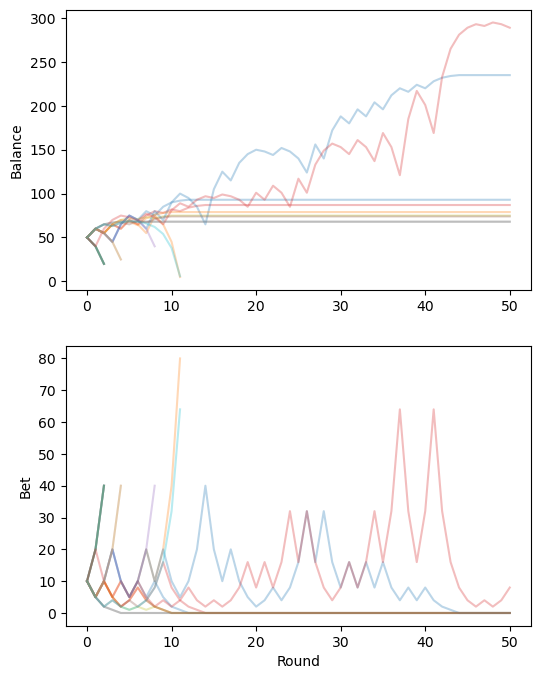

In [24]:
fig, axes = plt.subplots(2, 1, figsize=(6, 8))

balances = []
for i in range(20):
    simulator = MartingaleSimulator(initial_balance=50, bet_amount=10)
    simulator.simulate(num_rounds=50)
    axes[0].plot(simulator.balance_history, alpha=0.3)
    axes[1].plot(simulator.bet_history, alpha=0.3)

axes[1].set_xlabel("Round")
axes[0].set_ylabel("Balance")
axes[1].set_ylabel("Bet")

plt.show()

***Exercise 2.4***

Run a simulation of 50 rounds with initial wealth of 100 and inital bet size of 1. 

- Calculate the proportion of simulations that end up with a wealth below initial wealth.

- Visualize the distribution of the final wealth if you can.

### Solution

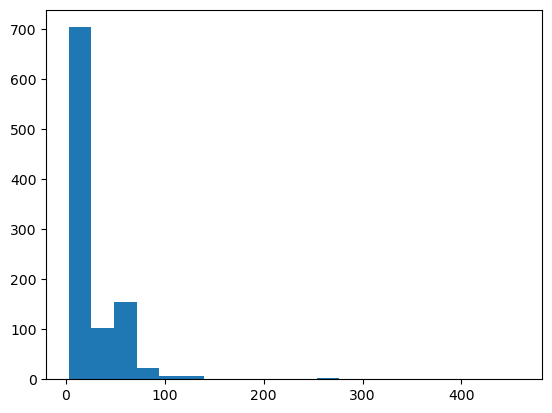

Probability of winning: 0.282
Median balance: 20.0


In [25]:
outcome = []
balances = []
for i in range(1000):
    simulator = MartingaleSimulator(initial_balance=30, bet_amount=10)
    outcome.append(simulator.simulate(num_rounds=100))
    balances.append(simulator.balance)

plt.hist(balances, bins=20)
plt.show()

print(f"Probability of winning: {np.mean(outcome)}")
print(f"Median balance: {np.median(balances)}")


We find that most people end up with a wealth below the initial wealth (Takeaway: Do Not Gamble).

### Solution

***Exercise 2.5***

Use the same setup as Exercise 2.4, but set up an unfair game with the probability of winning 0.4.

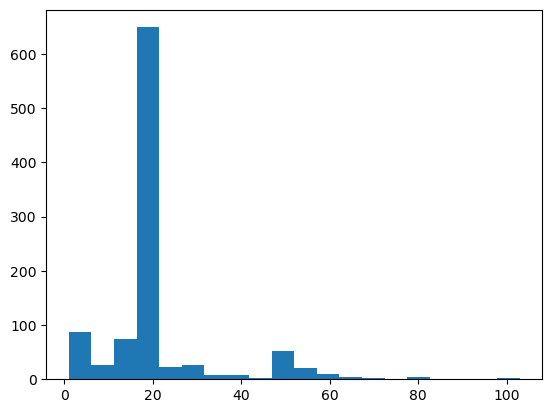

Probability of winning: 0.12
Median balance: 20.0


In [26]:
outcome = []
balances = []
for i in range(1000):
    simulator = MartingaleSimulator(initial_balance=30, bet_amount=10, prob=0.4)
    outcome.append(simulator.simulate(num_rounds=100))
    balances.append(simulator.balance)

plt.hist(balances, bins=20)
plt.show()

print(f"Probability of winning: {np.mean(outcome)}")
print(f"Median balance: {np.median(balances)}")

We find that the probability of winning is even lower.